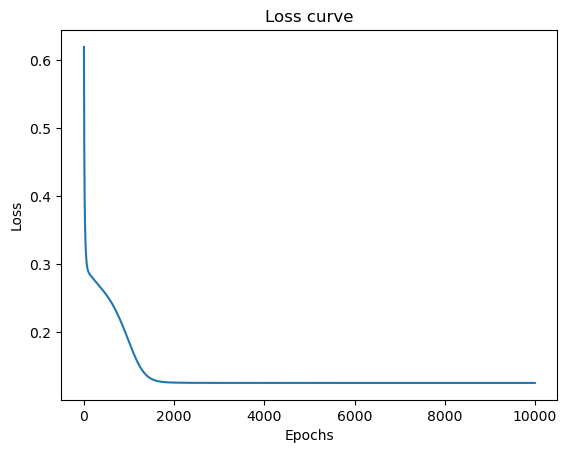

For input [0 0] output is [0,0]
For input [0 1] output is [0,1]
For input [1 0] output is [0,1]
For input [1 1] output is [1,0]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[1,0],[0,1],[0,1],[1,0]])
nx=2
nh=2
ny=2
lr=0.01
n_epochs=10000

w1=np.random.randn(nh,nx)
w2=np.random.randn(nh,nh)
w3=np.random.randn(ny,nh)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def linear(x):
    return x

def linear_derivative(x):
    return 1

def fprop(w1,w2,w3,x):
    z1=np.dot(x,w1.T)
    a1=np.tanh(z1)
    z2=np.dot(a1,w2.T)
    a2=np.tanh(z2)
    z3=np.dot(a2,w3.T)
    a3=linear(z3)
    return z1,a1,z2,a2,z3,a3

def bprop(w1,w2,w3,z1,a1,z2,a2,z3,a3,y):
    e3 = y - a3  # Error at output
    del3 = linear_derivative(z3) * e3  # Output layer delta
    e2 = np.dot(del3, w3)  # Summation(delk * wkj) for hidden layer
    del2 = tanh_derivative(z2) * e2  # Hidden layer delta
    e1 = np.dot(del2, w2)
    del1 = tanh_derivative(z1) * e1
    dw3=lr*np.dot(del3.T,a2)
    dw2=lr*np.dot(del2.T,a1)
    dw1=lr*np.dot(del1.T,x)
    return dw3,dw2,dw1

losses=[]
for i in range(n_epochs):
    z1,a1,z2,a2,z3,a3=fprop(w1,w2,w3,x)
    loss=mean_squared_error(y,a3)
    losses.append(loss)
    dw3,dw2,dw1=bprop(w1,w2,w3,z1,a1,z2,a2,z3,a3,y)
    w3+=dw3
    w2+=dw2
    w1+=dw1

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.show()

def predict(w1,w2,w3,inp):
    z1,a1,z2,a2,z3,a3=fprop(w1,w2,w3,inp)
    if a3[0] >= 0.5 and a3[1] >= 0.5:
        print("For input",inp,"output is [1,1]")
    elif a3[0] >= 0.5 and a3[1] < 0.5:
        print("For input",inp,"output is [1,0]")
    elif a3[0] < 0.5 and a3[1] >= 0.5:
        print("For input",inp,"output is [0,1]")  
    else:
        print("For input",inp,"output is [0,0]")


test1=np.array([0,0])
test2=np.array([0,1])
test3=np.array([1,0])
test4=np.array([1,1])

predict(w1,w2,w3,test1)
predict(w1,w2,w3,test2)
predict(w1,w2,w3,test3)
predict(w1,w2,w3,test4)